In [322]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objects as go
from sklearn.preprocessing import LabelEncoder
import plotly.express as px

In [323]:
def suicide_sum(groupby_var, empty_df):
    list = []
    for df in sdf.groupby(groupby_var):
        new_df = df[1]
        suicides_no = new_df["suicides_no"].sum()
        list.append(suicides_no)

    empty_df[groupby_var] = sdf.groupby(groupby_var).dtypes.index
    empty_df["suicides_no"] = list

def column_sum(groupby_var, sum_variable, empty_df):
    list = []
    for df in sdf.groupby(groupby_var):
        new_df = df[1]
        sum_var = new_df[sum_variable].sum()
        list.append(sum_var)

    empty_df[groupby_var] = sdf.groupby(groupby_var).dtypes.index
    empty_df[sum_variable] = list

suicide_sum: A def for making a dataframe including one of the sdf's columns of your choice and sdf["suicides_no"].sum() of the groupby of that column.

sum: A def for making a dataframe including two of the sdf's columns of your choice that will groupby "groupby_var" and compute the sum of sum_variable.

In [324]:
sdf = pd.read_csv("Suicide Rates Overview 1985 to 2016.csv")
sdf.head()

country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year  gdp_per_capita  \
0               6.71  Albania1987           NaN    2156624900             796   
1               5.19  Albania1987           NaN    2156624900             796   
2               4.83  Albania1987           NaN    2156624900             796   
3               4.59  Albania1987           NaN    2156624900             796   
4               3.28  Albania1987           NaN    2156624900             796   

        generation  
0     Generation X  
1           Silent  
2     Generation X  
3  G.I. Generation  
4          Boomers

In [325]:
sdf = sdf.drop(columns=["HDI for year", "country-year"]).dropna().drop_duplicates()
sdf.drop(sdf[sdf["year"] == 2016].index, inplace = True)

Drop section; excluding 2016 because it's data is incomplete

In [326]:
encoder = LabelEncoder()

sdf["encode_sex"] = encoder.fit_transform(sdf["sex"])
print(encoder.inverse_transform([0, 1]))

sdf["encode_generation"] = encoder.fit_transform(sdf["generation"])
print(encoder.inverse_transform([0, 1, 2, 3, 4, 5]))

sdf["encode_country"] = encoder.fit_transform(sdf["country"])
print(encoder.inverse_transform(sdf["encode_country"]))

sdf["encode_age"] = encoder.fit_transform(sdf["age"])
print(encoder.inverse_transform([0, 1, 2, 3, 4, 5]))

['female' 'male']
['Boomers' 'G.I. Generation' 'Generation X' 'Generation Z' 'Millenials'
 'Silent']
['Albania' 'Albania' 'Albania' ... 'Uzbekistan' 'Uzbekistan' 'Uzbekistan']
['15-24 years' '25-34 years' '35-54 years' '5-14 years' '55-74 years'
 '75+ years']


Encoding columns for heatmap and decoding them to see what are the values of each.

In [327]:
sdf.head()

country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop  gdp_for_year  gdp_per_capita       generation  \
0               6.71    2156624900             796     Generation X   
1               5.19    2156624900             796           Silent   
2               4.83    2156624900             796     Generation X   
3               4.59    2156624900             796  G.I. Generation   
4               3.28    2156624900             796          Boomers   

   encode_sex  encode_generation  encode_country  encode_age  
0           1                  2               0           0  
1           1                  5               0           2  
2           0                  2               0           0  
3           1                  1               0           5  
4           1                  0               0           1

In [328]:
sorted_sdf = sdf.sort_values(by=["suicides_no"])
sorted_sdf.head()

country  year     sex          age  suicides_no  population  \
21351  Saint Lucia  1990  female    75+ years            0        2160   
21352  Saint Lucia  1990    male  35-54 years            0       10663   
59         Albania  1993  female    75+ years            0       39300   
44         Albania  1992  female   5-14 years            0      336700   
45         Albania  1992  female    75+ years            0       38700   

       suicides/100k pop  gdp_for_year  gdp_per_capita       generation  \
21351                0.0     483962431            4015  G.I. Generation   
21352                0.0     483962431            4015           Silent   
59                   0.0    1228071038             437  G.I. Generation   
44                   0.0     709452584             251       Millenials   
45                   0.0     709452584             251  G.I. Generation   

       encode_sex  encode_generation  encode_country  encode_age  
21351           0                  1              76           5  
21352           1                  5              76           2  
59              0                  1               0           5  
44              0                  4               0           3  
45              0                  1               0           5

Sorting our dataframe for later usage.

<Axes: >

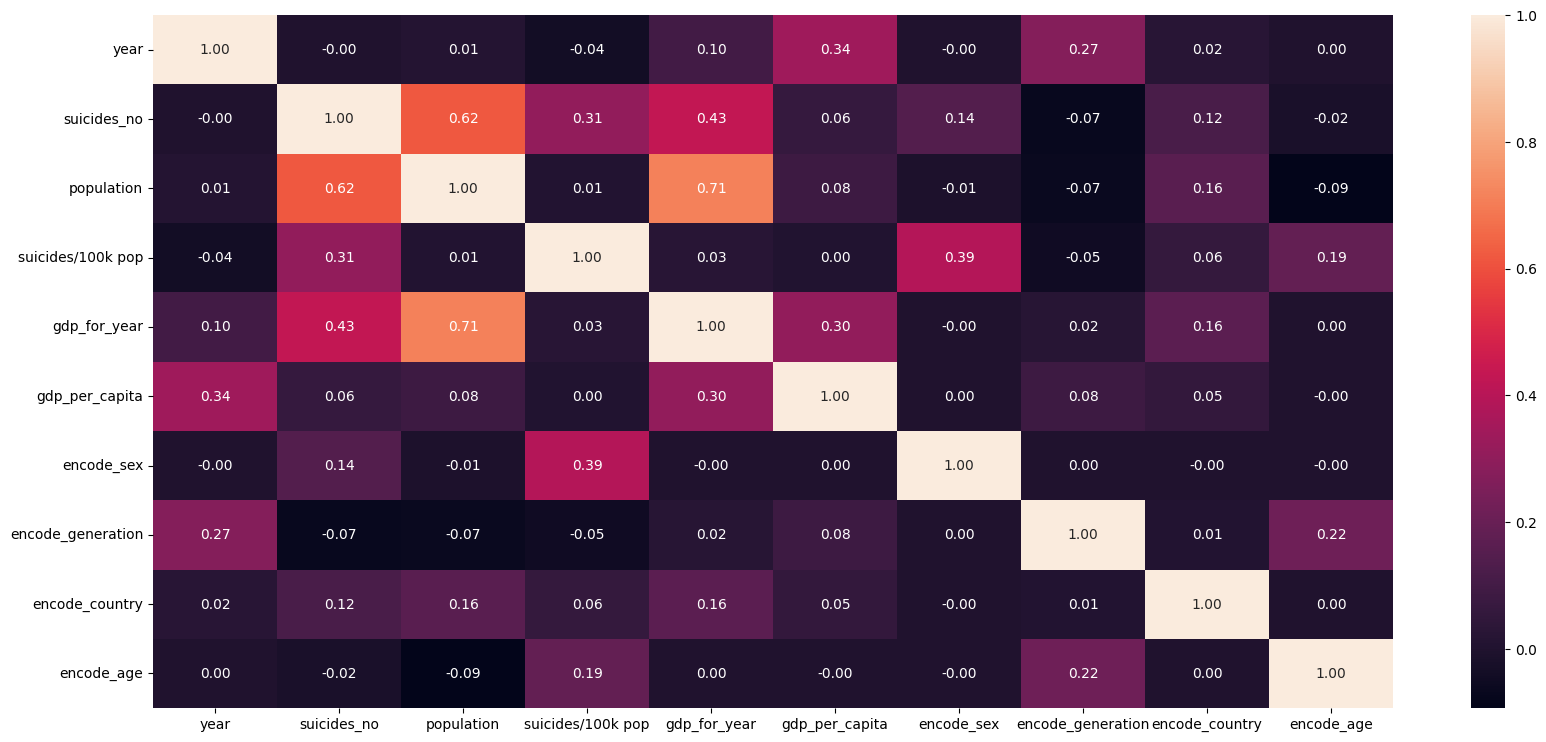

In [329]:
plt.figure(figsize=(20,9))
tmp = sdf.drop(columns=["country","sex","age","generation"])
sns.heatmap(tmp.corr(), annot=True, fmt="0.2f")

Heatmap, correlation:
From our heatmap with a function of corelation we can see "gpd for year" and "population" are highly associated with a coefficient of 0.71
The same goes for population and number of suicides(coefficient = 0.62).
gpd for year and number of suicides(coefficient = 0.43).
sex and suicides/100k pop(coefficient = 0.39).

In [330]:
c_sdf = pd.DataFrame()
suicide_sum("country", c_sdf)
sorted_c_sdf = c_sdf.sort_values(by=["suicides_no"], ascending=False)
c_sdf.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23624\3124492997.py:8: FutureWarning:

DataFrameGroupBy.dtypes is deprecated and will be removed in a future version. Check the dtypes on the base object instead



country  suicides_no
0              Albania         1970
1  Antigua and Barbuda           11
2            Argentina        82219
3              Armenia         1838
4                Aruba          101

Using the "suicide_sum" Def to make a df of sdf["country"] and combining each country "suicides_no" seperatly as c_sdf,
and Using c_sdf to make a sorted bar plot.

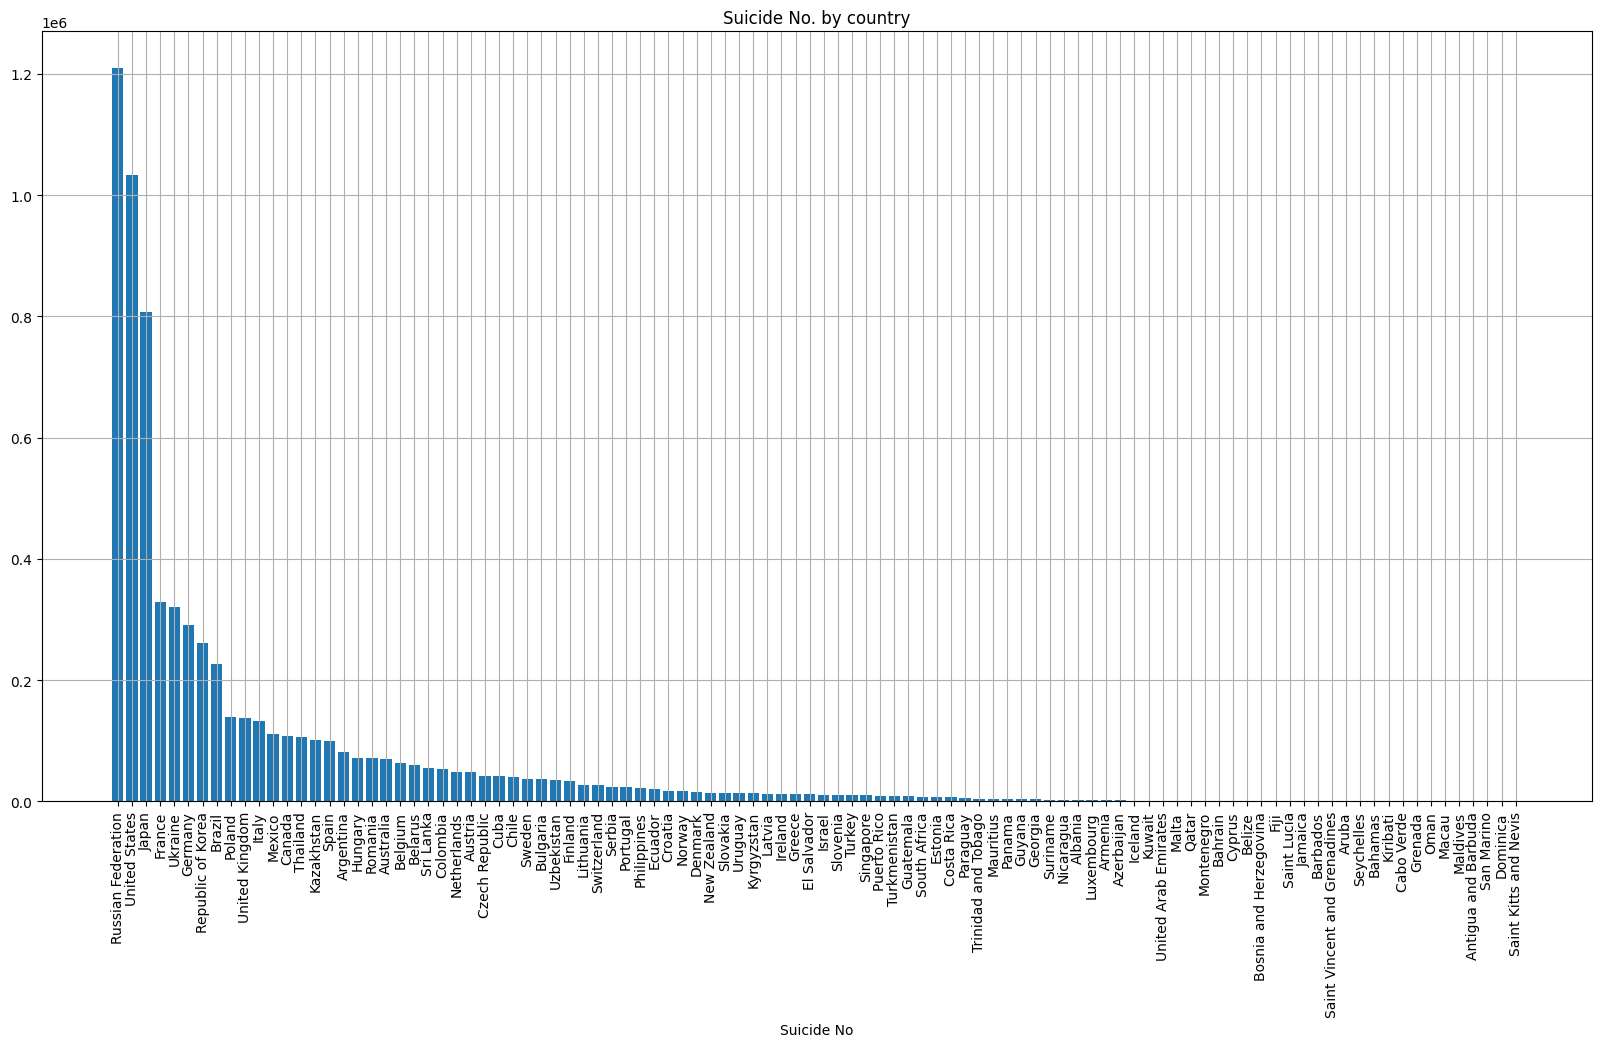

In [331]:
fig= plt.figure(figsize=(20, 10))
ax = fig.add_subplot()

ax.bar(sorted_c_sdf["country"], sorted_c_sdf["suicides_no"])
ax.set_xticks(np.arange(len(sorted_c_sdf["country"])), labels=sorted_c_sdf["country"],rotation=90)
ax.set_xlabel("Countries")
ax.set_xlabel("Suicide No")
ax.set_title("Suicide No. by country")
ax.grid()

From the plot we can see that the top three countries which people commited suicide in the most are:
1. Russian Federation: 1,209,742
2. United States: 1,034,013
3. Japan: 806,902

In [332]:
y_sdf = pd.DataFrame()
suicide_sum("year", y_sdf)
y_sdf.drop(y_sdf[y_sdf["year"] == 2016].index, inplace = True)
y_sdf.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23624\3124492997.py:8: FutureWarning:

DataFrameGroupBy.dtypes is deprecated and will be removed in a future version. Check the dtypes on the base object instead



year  suicides_no
0  1985       116063
1  1986       120670
2  1987       126842
3  1988       121026
4  1989       160244

Using the "suicide_sum" Def to make a df of sdf["year"] and combining each year "suicides_no" seperatly as y_sdf,
and Using y_sdf to make a sorted bar plot.

Text(0, 0.5, 'Suicide No')

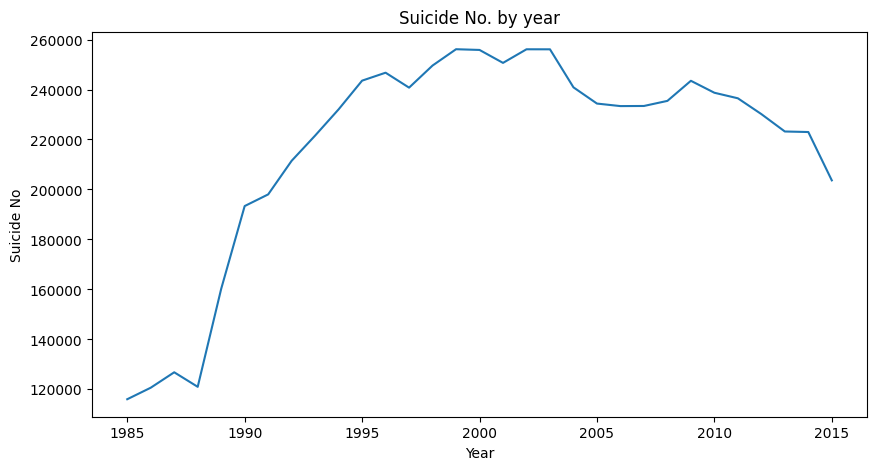

In [333]:
fig= plt.figure(figsize=(10, 5))
ax = fig.add_subplot()
plt.plot(y_sdf["year"], y_sdf["suicides_no"])
ax.set_title("Suicide No. by year")
ax.set_xlabel("Year")
ax.set_ylabel("Suicide No")

In [334]:
rate_of_change_list = []
year_change_list = []

for year in y_sdf["year"]:
    year_change_list.append(f"{year} to {year+1}")
    
for amount in y_sdf["suicides_no"]:
    
    try:
        rate_of_change = ((amount - old_amount)/abs(old_amount))*100
        rate_of_change_list.append(rate_of_change)
    except:
        ""
    old_amount = amount
    
rate_of_change_df = pd.DataFrame()
rate_of_change_df.index = year_change_list
rate_of_change_df["rate of change"] = rate_of_change_list
rate_of_change_df = rate_of_change_df.shift(periods=-1).dropna()
print(rate_of_change_df)

              rate of change
1985 to 1986        3.969396
1986 to 1987        5.114776
1987 to 1988       -4.585232
1988 to 1989       32.404607
1989 to 1990       20.666608
1990 to 1991        2.409483
1991 to 1992        6.793758
1992 to 1993        4.772240
1993 to 1994        4.738113
1994 to 1995        4.947363
1995 to 1996        1.306129
1996 to 1997       -2.423751
1997 to 1998        3.674427
1998 to 1999        2.615479
1999 to 2000       -0.112057
2000 to 2001       -2.024766
2001 to 2002        2.171537
2002 to 2003       -0.006248
2003 to 2004       -5.942697
2004 to 2005       -2.692839
2005 to 2006       -0.432640
2006 to 2007        0.020140
2007 to 2008        0.873578
2008 to 2009        3.414781
2009 to 2010       -1.965197
2010 to 2011       -0.929192
2011 to 2012       -2.674177
2012 to 2013       -3.024418
2013 to 2014       -0.096327
2014 to 2015       -8.675062


در این دیتافریم نرخ تغییرات آمار خودکشی در سالهای مختلف را مشاهدی میکنیم. این آمار از سال 1988 تا 1990 شدیدا (52%) افزایش داشته, از سال 1990 تا 1996 25 درصد افزایش  و بعد از آن تا سال 2015 به تدریج کاهش پیدا کرده

In [335]:
s_sdf = pd.DataFrame()
suicide_sum("sex", s_sdf)
s_sdf.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23624\3124492997.py:8: FutureWarning:

DataFrameGroupBy.dtypes is deprecated and will be removed in a future version. Check the dtypes on the base object instead



sex  suicides_no
0  female      1556006
1    male      5176811

Using the "suicide_sum" Def to make a df of sdf["sex"] and combining each sex "suicides_no" seperatly as s_sdf,
and Using s_sdf to make a sorted bar plot, and a pie plot.

In [336]:
mf_ratio = (s_sdf.at[1, "suicides_no"]) / (s_sdf.at[0, "suicides_no"])

for mean_df in sdf.groupby("sex"):
    new_mean_df = mean_df[1]
    
    if new_mean_df.iloc[0]["sex"] == "male":
        male_mean = new_mean_df["suicides_no"].mean()
         
    elif new_mean_df.iloc[0]["sex"] == "female":
        female_mean = new_mean_df["suicides_no"].mean()

print(f"The avrage of suicides is <for men: {male_mean}>, <for women: {female_mean}> and the suicide ratio (men/women) is <{mf_ratio}>")

The avrage of suicides is <for men: 374.3174981923355>, <for women: 112.50947216196674> and the suicide ratio (men/women) is <3.326986528329582>


computing avg of each sex's number of suicides and raitio of (men/women) suicides

In [337]:
fig = plt.figure()
ax = fig.add_subplot()
ax.bar(s_sdf["sex"], s_sdf["suicides_no"], color= ["orange", "blue"])
ax.set_yticks(s_sdf["suicides_no"], labels=s_sdf["suicides_no"],rotation=0)
ax.set_xticks([0, 1], ["Women","Men"], rotation=0)
ax.set_title("Suicide No. by sex")

Text(0.5, 1.0, 'Suicide No. by sex')

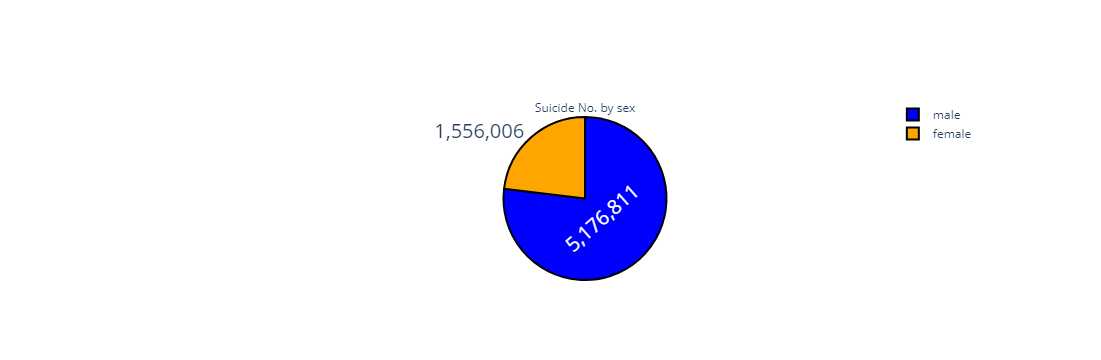

In [338]:
# plt.pie(s_sdf["suicides_no"], labels = s_sdf["sex"])

colors = ["orange", "blue"]

fig = go.Figure(data=[go.Pie(labels=s_sdf["sex"],
                             values=s_sdf["suicides_no"], title="Suicide No. by sex")])
fig.update_traces( hoverinfo="label+percent", textinfo="value", textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

Men who commited suicide are 3,620,805 more than the amount of women who commited suicide.

In [339]:
a_sdf = pd.DataFrame()
suicide_sum("age", a_sdf)
sorted_a_sdf = a_sdf.sort_values(by=["suicides_no"], ascending=False)
sorted_a_sdf.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23624\3124492997.py:8: FutureWarning:

DataFrameGroupBy.dtypes is deprecated and will be removed in a future version. Check the dtypes on the base object instead



age  suicides_no
2  35-54 years      2446375
4  55-74 years      1653728
1  25-34 years      1121842
0  15-24 years       807347
5    75+ years       651261

Using the "suicide_sum" Def to make a df of sdf["age"] and combining each age "suicides_no" seperatly as a_sdf,
and Using a_sdf to make a sorted bar plot.

Text(0.5, 1.0, 'Suicide No. in different age group ranges')

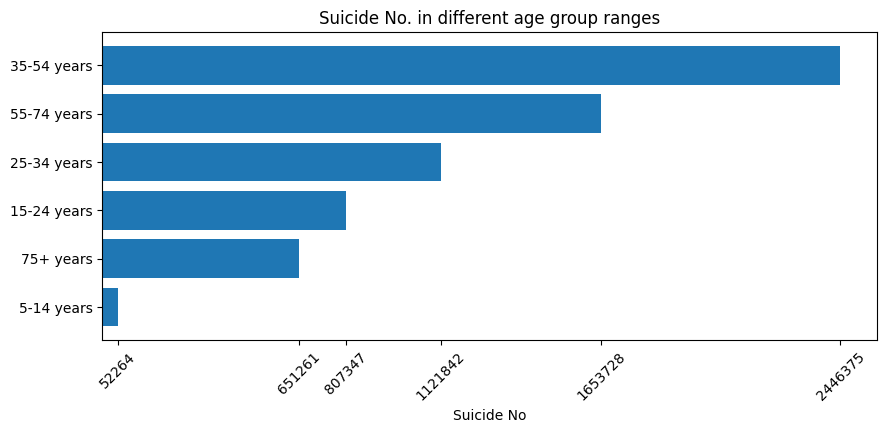

In [340]:
fig= plt.figure(figsize=(10, 4))
ax = fig.add_subplot()

y_pos = np.arange(len(sorted_a_sdf["age"]))

ax.barh(y_pos, sorted_a_sdf["suicides_no"],align="center")
ax.set_yticks(y_pos, labels=sorted_a_sdf["age"],rotation=0)
ax.set_xticks(sorted_a_sdf["suicides_no"], labels=sorted_a_sdf["suicides_no"],rotation=45)
ax.invert_yaxis()
ax.set_xlabel("Suicide No")
ax.set_title("Suicide No. in different age group ranges")

We can see that the most age range that commited suicide are 35 to 54 year olds.

In [341]:
(px.bar(sdf, x="suicides_no",y="age", color="sex", title="Suicide No. in different age group ranges and sexs",
        barmode="group", width=800, height=600).update_layout(title_font_size=24).update_xaxes(showgrid=True)).show()

In [342]:
g_sdf = pd.DataFrame()
suicide_sum("generation", g_sdf)
sorted_g_sdf = g_sdf.sort_values(by=["suicides_no"], ascending=False)
sorted_g_sdf.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23624\3124492997.py:8: FutureWarning:

DataFrameGroupBy.dtypes is deprecated and will be removed in a future version. Check the dtypes on the base object instead



generation  suicides_no
0          Boomers      2279783
5           Silent      1779887
2     Generation X      1527038
4       Millenials       620194
1  G.I. Generation       510009

Using the "suicide_sum" Def to make a df of sdf["generation"] and combining each generation "suicides_no" seperatly as g_sdf,
and Using g_sdf to make a sorted bar plot.

Text(0.5, 1.0, 'Suicide No. in different generations')

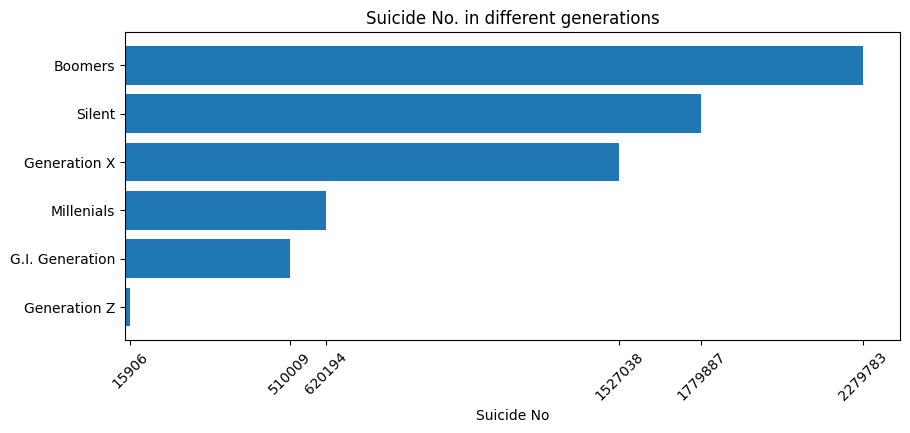

In [343]:
fig= plt.figure(figsize=(10, 4))
ax = fig.add_subplot()

y_pos = np.arange(len(sorted_g_sdf["generation"]))

ax.barh(y_pos, sorted_g_sdf["suicides_no"],align="center")
ax.set_yticks(y_pos, labels=sorted_g_sdf["generation"],rotation=0)
ax.set_xticks(sorted_g_sdf["suicides_no"], labels=sorted_g_sdf["suicides_no"],rotation=45)
ax.invert_yaxis()
ax.set_xlabel("Suicide No")
ax.set_title("Suicide No. in different generations")

We can see on this plot that the most generation whom commited suicide are the "Boomers";

In [344]:
gp_sdf = pd.DataFrame()
column_sum("generation", "population", gp_sdf)
sorted_gp_sdf = gp_sdf.sort_values(by=["population"], ascending=False)
sorted_gp_sdf.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23624\3124492997.py:18: FutureWarning:

DataFrameGroupBy.dtypes is deprecated and will be removed in a future version. Check the dtypes on the base object instead



generation   population
2  Generation X  13424794317
0       Boomers  13318427149
4    Millenials  10606523160
5        Silent   9210567348
3  Generation Z   2503541842

In [345]:
px.bar(sorted_gp_sdf, x="generation", y="population", title="Population of each generation")

And the most refered to generation is the generation X.
Althought Boomers are the 2nd populated in the dataset, but they commited the most suicides(%28 more than generation X).

In [346]:
# groupby 1st layer ==> sex, 2nd layer ==> year
suicides_no_list = []
sui_year_sex_list = []
for df in sdf.groupby("sex"):
    new_df = df[1]
    for df1 in new_df.groupby("year"):
        new_df1 = df1[1]
        suicides_no = new_df1["suicides_no"].sum()
        sex = new_df1.iloc[1]["sex"]
        suicides_no_list.append(suicides_no)
        sui_year_sex_list.append(sex)

suicide_sum_year_sex_df = pd.DataFrame()
suicide_sum_year_sex_df["year"] = sdf.groupby("year").dtypes.index.append(sdf.groupby("year").dtypes.index)
suicide_sum_year_sex_df["suicides_no"] = suicides_no_list
suicide_sum_year_sex_df["sex"] = sui_year_sex_list
# suicide_sum_year_sex_df.head()
print(suicide_sum_year_sex_df)

    year  suicides_no     sex
0   1985        32479  female
1   1986        33852  female
2   1987        35006  female
3   1988        33015  female
4   1989        41361  female
..   ...          ...     ...
57  2011       181868    male
58  2012       177149    male
59  2013       171740    male
60  2014       171428    male
61  2015       156392    male

[62 rows x 3 columns]


C:\Users\ASUS\AppData\Local\Temp\ipykernel_23624\2132009377.py:14: FutureWarning:

DataFrameGroupBy.dtypes is deprecated and will be removed in a future version. Check the dtypes on the base object instead

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23624\2132009377.py:14: FutureWarning:

DataFrameGroupBy.dtypes is deprecated and will be removed in a future version. Check the dtypes on the base object instead



suicide_sum_year_sex_df is a df made up by 3 variables:
. year
. sex
. suicides_no

In [347]:
y = np.arange(len(y_sdf["year"]))
width = 0.38

for df in suicide_sum_year_sex_df.groupby("sex"):
    new_suicide_sum_year_sex_df = df[1]
    
    if new_suicide_sum_year_sex_df.iloc[0]["sex"] == "female":
        female = new_suicide_sum_year_sex_df["suicides_no"]
    elif new_suicide_sum_year_sex_df.iloc[0]["sex"] == "male":
        male = new_suicide_sum_year_sex_df["suicides_no"]
     
fig, ax = plt.subplots(figsize=(20,11))
barh_female = ax.barh(y + width/2, female, width, label="Women", color="orange")
barh_male = ax.barh(y - width/2, male, width, label="Men", color="green")

ax.set_xlabel("suicide_no")
ax.set_title("Suicide No. by year and gender")
ax.set_yticks(y)
ax.set_yticklabels(y_sdf["year"])
ax.legend()

ax.bar_label(barh_female, label_type="center")
ax.bar_label(barh_male, label_type="center")

[Text(0, 0, '83584'),
 Text(0, 0, '86818'),
 Text(0, 0, '91836'),
 Text(0, 0, '88011'),
 Text(0, 0, '118883'),
 Text(0, 0, '143243'),
 Text(0, 0, '148398'),
 Text(0, 0, '159906'),
 Text(0, 0, '170234'),
 Text(0, 0, '180531'),
 Text(0, 0, '189040'),
 Text(0, 0, '192142'),
 Text(0, 0, '186619'),
 Text(0, 0, '193960'),
 Text(0, 0, '199904'),
 Text(0, 0, '200578'),
 Text(0, 0, '197653'),
 Text(0, 0, '200546'),
 Text(0, 0, '200452'),
 Text(0, 0, '187629'),
 Text(0, 0, '182340'),
 Text(0, 0, '181322'),
 Text(0, 0, '180084'),
 Text(0, 0, '181474'),
 Text(0, 0, '188567'),
 Text(0, 0, '184480'),
 Text(0, 0, '181868'),
 Text(0, 0, '177149'),
 Text(0, 0, '171740'),
 Text(0, 0, '171428'),
 Text(0, 0, '156392')]

This plot shows that from 1985 to 2003 number of suicides was overall increasing and them decreasing between the 2004 to 2015.

In [348]:
sorted_suicide_sum_year_sex_df = suicide_sum_year_sex_df.sort_values(by=["suicides_no"])
sorted_y_sdf = y_sdf.sort_values(by=["suicides_no"])

for df in sorted_suicide_sum_year_sex_df.groupby("sex"):
    new_sorted_suicide_sum_year_sex_df = df[1]
    
    if new_sorted_suicide_sum_year_sex_df.iloc[0]["sex"] == "female":
        female = new_sorted_suicide_sum_year_sex_df["suicides_no"]
    elif new_sorted_suicide_sum_year_sex_df.iloc[0]["sex"] == "male":
        male = new_sorted_suicide_sum_year_sex_df["suicides_no"]
    
fig, ax = plt.subplots(figsize=(20,11))
y = np.arange(len(sorted_y_sdf["year"]))
width = 0.4
barh_female = ax.barh(y + width/2, female, width, label="Women", color="orange")
barh_male = ax.barh(y - width/2, male, width, label="Men", color="green")

ax.set_xlabel("suicide_no")
ax.set_title("Suicide No. by year and gender(sorted)")
ax.set_yticks(y)
ax.set_yticklabels(sorted_y_sdf["year"])
ax.legend()

ax.bar_label(barh_female, label_type="center")
ax.bar_label(barh_male, label_type="center")

[Text(0, 0, '83584'),
 Text(0, 0, '86818'),
 Text(0, 0, '88011'),
 Text(0, 0, '91836'),
 Text(0, 0, '118883'),
 Text(0, 0, '143243'),
 Text(0, 0, '148398'),
 Text(0, 0, '156392'),
 Text(0, 0, '159906'),
 Text(0, 0, '170234'),
 Text(0, 0, '171428'),
 Text(0, 0, '171740'),
 Text(0, 0, '177149'),
 Text(0, 0, '180084'),
 Text(0, 0, '180531'),
 Text(0, 0, '181322'),
 Text(0, 0, '181474'),
 Text(0, 0, '181868'),
 Text(0, 0, '182340'),
 Text(0, 0, '184480'),
 Text(0, 0, '186619'),
 Text(0, 0, '187629'),
 Text(0, 0, '188567'),
 Text(0, 0, '189040'),
 Text(0, 0, '192142'),
 Text(0, 0, '193960'),
 Text(0, 0, '197653'),
 Text(0, 0, '199904'),
 Text(0, 0, '200452'),
 Text(0, 0, '200546'),
 Text(0, 0, '200578')]

This is the sorted version of Suicide No. by year and gender plot
what its trying to tell us is that the most suicides that acoured in between1985 and 2015 was for the years:
1. 1999: total of 256,793
2. 2002: total of 256,177
3. 2003: total of 256,079

In [349]:
ratio_list = []
for df in suicide_sum_year_sex_df.groupby("year"):
    new_df = df[1]
    for sex in new_df["sex"]:
        if sex == "male":
            suicide_sum_male = new_df.iloc[1]["suicides_no"]
            
            try:
                ratio = suicide_sum_male/suicide_sum_female
                ratio_list.append(ratio)
            except:
                ""
        elif sex == "female":
            suicide_sum_female = new_df.iloc[0]["suicides_no"]
            
ratio_df = pd.DataFrame()
ratio_df["year"] = y_sdf["year"]
ratio_df["ratio"] = ratio_list

for row in ratio_df.index:
    print( f"     year: {"%.0f" % ratio_df.iloc[row]["year"]}\nM/F ratio: {"%.3f" % ratio_df.iloc[row]["ratio"]}\n")


     year: 1985
M/F ratio: 2.573

     year: 1986
M/F ratio: 2.565

     year: 1987
M/F ratio: 2.623

     year: 1988
M/F ratio: 2.666

     year: 1989
M/F ratio: 2.874

     year: 1990
M/F ratio: 2.858

     year: 1991
M/F ratio: 2.991

     year: 1992
M/F ratio: 3.101

     year: 1993
M/F ratio: 3.316

     year: 1994
M/F ratio: 3.503

     year: 1995
M/F ratio: 3.468

     year: 1996
M/F ratio: 3.520

     year: 1997
M/F ratio: 3.448

     year: 1998
M/F ratio: 3.487

     year: 1999
M/F ratio: 3.556

     year: 2000
M/F ratio: 3.630

     year: 2001
M/F ratio: 3.729

     year: 2002
M/F ratio: 3.610

     year: 2003
M/F ratio: 3.604

     year: 2004
M/F ratio: 3.525

     year: 2005
M/F ratio: 3.504

     year: 2006
M/F ratio: 3.484

     year: 2007
M/F ratio: 3.377

     year: 2008
M/F ratio: 3.362

     year: 2009
M/F ratio: 3.433

     year: 2010
M/F ratio: 3.402

     year: 2011
M/F ratio: 3.330

     year: 2012
M/F ratio: 3.342

     year: 2013
M/F ratio: 3.337

     year: 201

This cell indicates each year M/F suicide ratio.
from the 1990 up to 2001 the M/F suicide ration rose up on avg. 

In [350]:
# groupby 1st layer ==> country, 2nd layer ==> sex
suisum_country_list = []
suicide_country_sex_list = []
for df in sdf.groupby("sex"):
    new_df = df[1]
    for df1 in new_df.groupby("country"):
        new_df1 = df1[1]
        suicides_no = new_df1["suicides_no"].sum()
        sex = new_df1.iloc[1]["sex"]
        suisum_country_list.append(suicides_no)
        suicide_country_sex_list.append(sex)
        # print(new_df1)
    
suicide_sum_country_sex_df = pd.DataFrame()
suicide_sum_country_sex_df["country"] = sdf.groupby("country").dtypes.index.append(sdf.groupby("country").dtypes.index)
suicide_sum_country_sex_df["suicides_no"] = suisum_country_list
suicide_sum_country_sex_df["sex"] = suicide_country_sex_list
suicide_sum_country_sex_df.head()
# print(suicide_sum_country_sex_df)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23624\1654618681.py:15: FutureWarning:

DataFrameGroupBy.dtypes is deprecated and will be removed in a future version. Check the dtypes on the base object instead

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23624\1654618681.py:15: FutureWarning:

DataFrameGroupBy.dtypes is deprecated and will be removed in a future version. Check the dtypes on the base object instead



country  suicides_no     sex
0              Albania          693  female
1  Antigua and Barbuda            1  female
2            Argentina        18326  female
3              Armenia          481  female
4                Aruba           17  female

suicide_sum_country_sex_df is a df made up by 3 variables:
. country
. sex
. suicides_no

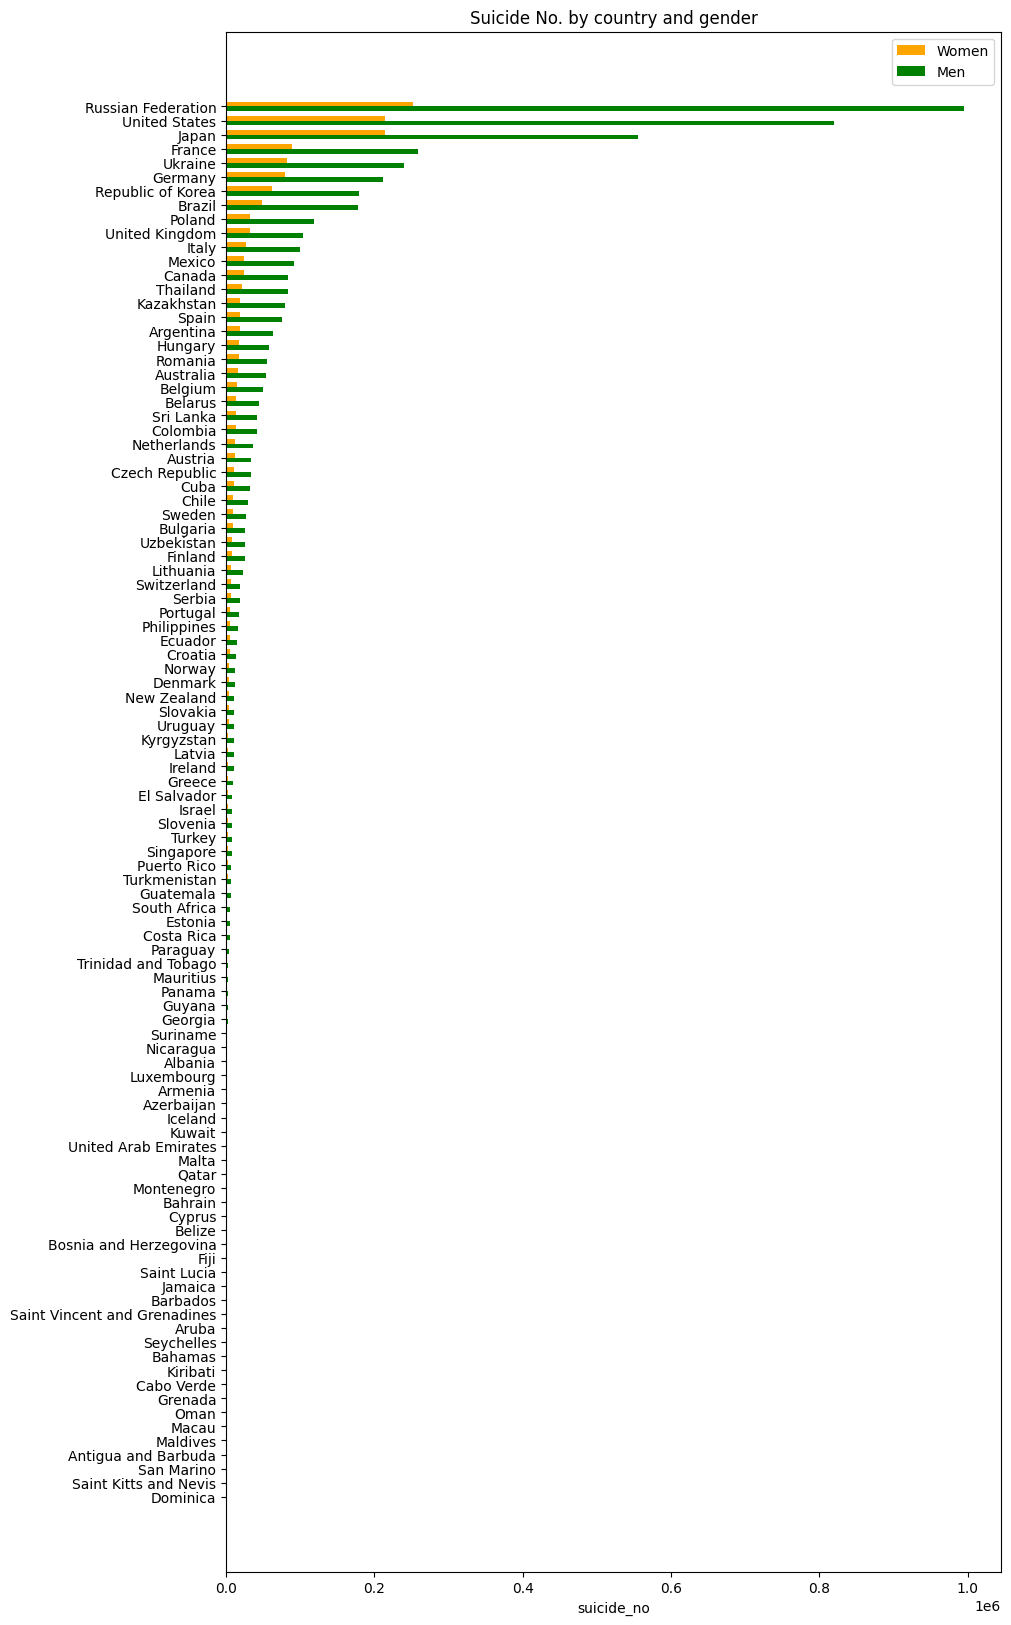

In [351]:
sorted_c_sdf = c_sdf.sort_values(by=["suicides_no"])
sorted_suicide_sum_country_sex_df = suicide_sum_country_sex_df.sort_values(by=["suicides_no"])


for df in sorted_suicide_sum_country_sex_df.groupby("sex"):
    new_suicide_sum_country_sex_df = df[1]
    
    if new_suicide_sum_country_sex_df.iloc[0]["sex"] == "female":
        female = new_suicide_sum_country_sex_df["suicides_no"]
        
    elif new_suicide_sum_country_sex_df.iloc[0]["sex"] == "male":
        male = new_suicide_sum_country_sex_df["suicides_no"]

y = np.arange(len(sorted_c_sdf["country"]))
width = 0.35 
fig, ax = plt.subplots(figsize=(10,20)) 
barh_female = ax.barh(y + width/2, female, width, label="Women", color="orange")
barh_male = ax.barh(y - width/2, male, width, label="Men", color="green")

ax.set_xlabel("suicide_no")
ax.set_title("Suicide No. by country and gender")
ax.set_yticks(y)
ax.set_yticklabels(sorted_c_sdf["country"])
ax.legend()

# ax.bar_label(barh_female, label_type="edge")
# ax.bar_label(barh_male, label_type="edge")

Sorted plot for Suicide No. by country and gender

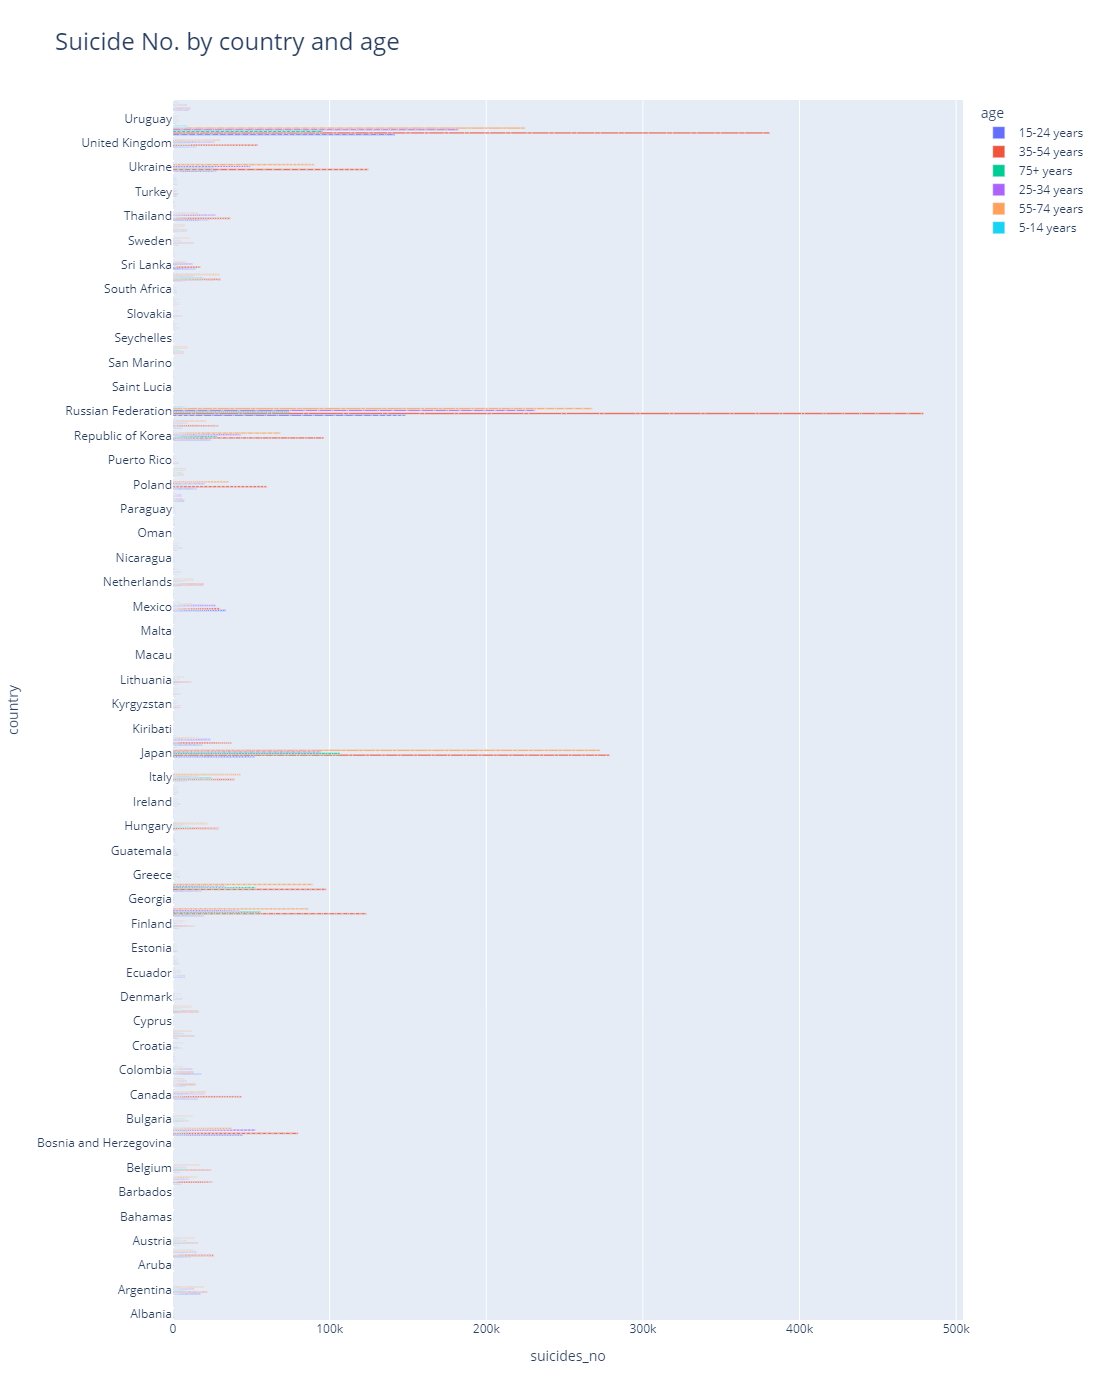

In [352]:
fig = px.bar(sdf, x="suicides_no",y="country", color="age",title= "Suicide No. by country and age",
        barmode="group", width=1000, height=1400).update_layout(title_font_size=24).update_xaxes(showgrid=True).show()

plot for Suicide No. by country and age

In [353]:
plt.show()